# Load raster data via WCS and xarray

In [1]:
from datetime import datetime

import geoengine as ge

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030
Session Id:          18fec623-6600-41af-b82b-24ccf47cb9f9

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                        }
                    }
                }
            })
workflow

c7b7c5c8-ee11-5418-bd1f-9e5889f6e04a

## Query the ResultDescriptor

In [5]:
workflow.get_result_descriptor()

Data type:         U8
Spatial Reference: EPSG:4326
Measurement:       vegetation

## Query raster via WCS

In [6]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

data = workflow.get_xarray(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=[360. / 16, 180. / 16],
        )
)

data

<xarray.DataArray (band: 1, y: 16, x: 16)>
array([[[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255,  19, 255,  14,  19,  20, 255, 255, 255,  15,  21,
          19,  19, 255, 255],
        [255,  39, 125,  23, 255, 255, 255, 255,  29, 177, 106,  59,
          45,  83,  16,  21],
        [255, 255,  22,  52,  22,  59, 255, 255, 211, 143, 133,  97,
         104, 118, 255, 255],
        [255, 255, 227, 111, 152, 255, 255, 255, 255, 124,  70,  36,
          48, 255, 255, 255],
        [255, 255, 255,  93, 255, 255, 255,  53,  55,  47,  66, 110,
         156, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255,  62,  51,  56, 255, 100,
         167, 255, 255, 255],
        [255, 255, 255, 255, 255, 136, 255, 255, 222, 118, 255, 255,
         234, 255, 255, 255],
        [255, 255, 255, 255, 195, 217, 255, 255, 255, 199, 255, 255,
         255, 255, 223, 255],
        [255, 255, 255, 255, 255, 233, 255, 255, 255, 206, 255, 255,
         255, 136, 255, 255],
        [255, 255, 255, 255, 255, 207, 255, 255, 255, 255, 255, 255,
         255,  91, 114, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255]]], dtype=uint8)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -168.8 -146.2 -123.8 -101.2 ... 123.8 146.2 168.8
  * y            (y) float64 84.38 73.12 61.88 50.62 ... -61.88 -73.12 -84.38
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    crs:            EPSG:4326
    res:            (22.5, -11.25)
    transform:      | 22.50, 0.00,-180.00|\n| 0.00,-11.25, 90.00|\n| 0.00, 0....

## Query raster with no_data_value instead of a mask

In [7]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

data_with_no_data_value = workflow.get_xarray(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=[360. / 16, 180. / 16],
        ),
        force_no_data_value=77.
)

data_with_no_data_value

<xarray.DataArray (band: 1, y: 16, x: 16)>
array([[[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255,  19, 255,  14,  19,  20, 255, 255, 255,  15,  21,
          19,  19, 255, 255],
        [255,  39, 125,  23, 255, 255, 255, 255,  29, 177, 106,  59,
          45,  83,  16,  21],
        [255, 255,  22,  52,  22,  59, 255, 255, 211, 143, 133,  97,
         104, 118, 255, 255],
        [255, 255, 227, 111, 152, 255, 255, 255, 255, 124,  70,  36,
          48, 255, 255, 255],
        [255, 255, 255,  93, 255, 255, 255,  53,  55,  47,  66, 110,
         156, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255,  62,  51,  56, 255, 100,
         167, 255, 255, 255],
        [255, 255, 255, 255, 255, 136, 255, 255, 222, 118, 255, 255,
         234, 255, 255, 255],
        [255, 255, 255, 255, 195, 217, 255, 255, 255, 199, 255, 255,
         255, 255, 223, 255],
        [255, 255, 255, 255, 255, 233, 255, 255, 255, 206, 255, 255,
         255, 136, 255, 255],
        [255, 255, 255, 255, 255, 207, 255, 255, 255, 255, 255, 255,
         255,  91, 114, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255]]], dtype=uint8)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -168.8 -146.2 -123.8 -101.2 ... 123.8 146.2 168.8
  * y            (y) float64 84.38 73.12 61.88 50.62 ... -61.88 -73.12 -84.38
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     77
    scale_factor:   1.0
    add_offset:     0.0
    crs:            EPSG:4326
    res:            (22.5, -11.25)
    transform:      | 22.50, 0.00,-180.00|\n| 0.00,-11.25, 90.00|\n| 0.00, 0....

## Plot the raster via matplotlib

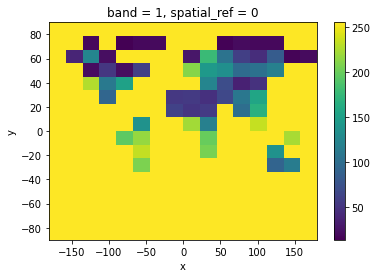

In [8]:
data.plot()

## Select North America (left upper part) from the data array via geo coordinates

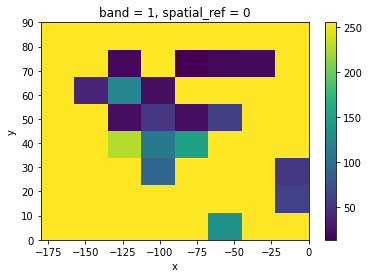

In [9]:
data.sel(x=slice(-180, 0), y=slice(90, 0)).plot()

## Get a pixel via geo coordinate

In [10]:
data.sel(x=[-150], y=[60], method="nearest")

<xarray.DataArray (band: 1, y: 1, x: 1)>
array([[[39]]], dtype=uint8)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -146.2
  * y            (y) float64 61.88
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    crs:            EPSG:4326
    res:            (22.5, -11.25)
    transform:      | 22.50, 0.00,-180.00|\n| 0.00,-11.25, 90.00|\n| 0.00, 0....

# Download raster as GeoTIFF

In [11]:
workflow.download_raster(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=[360. / 16, 180. / 16],
        ),
    "raster_download.tif"
)